<a href="https://colab.research.google.com/github/sujayrittikar/DeepLearning/blob/master/EarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, Y_train), (x_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

In [ ]:
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(784, )))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="sgd", loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=200)

In [ ]:
fitted = model.fit(x_train, Y_train, batch_size=10, epochs=10, validation_split=0.25, callbacks=[es])

Epoch 1/10
4500/4500 [==============================] - 11s 2ms/step - loss: 0.4720 - acc: 0.8594 - val_loss: 0.2530 - val_acc: 0.9249
Epoch 2/10
4500/4500 [==============================] - 11s 2ms/step - loss: 0.2031 - acc: 0.9395 - val_loss: 0.1743 - val_acc: 0.9477
Epoch 3/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.1459 - acc: 0.9569 - val_loss: 0.1586 - val_acc: 0.9535
Epoch 4/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.1139 - acc: 0.9658 - val_loss: 0.1264 - val_acc: 0.9637
Epoch 5/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.0933 - acc: 0.9723 - val_loss: 0.1186 - val_acc: 0.9658
Epoch 6/10
4500/4500 [==============================] - 11s 2ms/step - loss: 0.0770 - acc: 0.9771 - val_loss: 0.1370 - val_acc: 0.9595
Epoch 7/10
4500/4500 [==============================] - 9s 2ms/step - loss: 0.0660 - acc: 0.9803 - val_loss: 0.1097 - val_acc: 0.9690
Epoch 8/10
4500/4500 [==============================] - 

In [ ]:
model.evaluate(x_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0873 - acc: 0.9737


[0.08727212250232697, 0.9736999869346619]

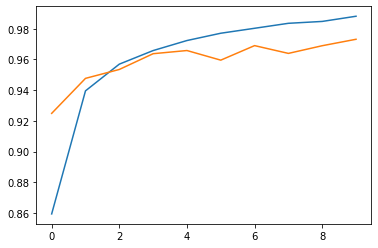

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fitted.history['acc'])
plt.plot(fitted.history['val_acc'])